## Observations and Insights 

1. The summary statistics show that among the drug regimens, capomulin and ramicane showed the most decrease in mean tumour volume (40.68 mm3 and 40.22 mm3, respectively) compared to the placebo (54.03 mm3).

2. Among the four drug regimens (capomulin, ramicane, infubinol and ceftamin), an outlier was observed in the infubinol drug regimen.

3. For the capomulin drug regimen, the plot of average tumour volume vs. mouse weight showed that there is a direct correlation between tumour volume and mouse weight; i.e., tumour volume increases with increasing mouse weight with a correlation value of 0.84.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

print(mouse_metadata["Mouse ID"].count())

249


In [3]:
#  Display the number of unique mice IDs in the data, and then check for any mouse ID with duplicate time points. 

timepoint_unique = mouse_results["Timepoint"].unique()
timepoint_unique

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [4]:
duplicate_mouse_ids = mouse_results.loc[mouse_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [5]:
# Display the data associated with the duplicate mouse ID

duplicate_mouse_data = mouse_results.loc[mouse_results["Mouse ID"] == "g989"]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a new DataFrame where this data is removed. 
# Use this cleaned DataFrame for the remaining steps.

clean_mouse_data = mouse_results.loc[mouse_results["Mouse ID"] != "g989"]
clean_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

In [8]:
# Display 
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# SUMMARY STATISTICS DATAFRAMES 1

# Group data by Drug Regimen
# Calculate the mean, median, variance, standard deviation, and SEM of the tumour volume for each regime

tumour_mean = clean_mouse_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].mean()
tumour_median = clean_mouse_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].median()
tumour_variance = clean_mouse_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].var()
tumour_stdev = clean_mouse_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].std()
tumour_sem = clean_mouse_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].sem()

# Create DataFrame to summarize calculations

treatment_group_df = pd.DataFrame({
    "Mean": tumour_mean,
    "Median": tumour_median,
    "Variance": tumour_variance,
    "Std Dev": tumour_stdev,
    "SEM": tumour_sem
})

treatment_group_df


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# SUMMARY STATISTICS DATAFRAMES 2

# Using the aggregation method, produce the same summary statistics in a single line

summary_table = clean_mouse_data.groupby("Drug Regimen").agg({"Tumour Volume (mm3)":["mean","median","var","std","sem"]})
summary_table


Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

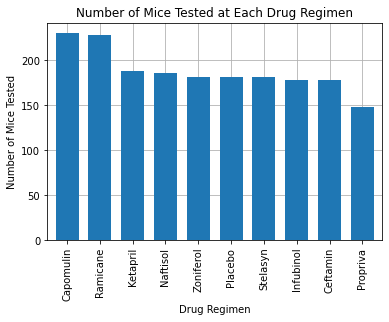

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_plot = clean_mouse_data["Drug Regimen"].value_counts().plot.bar(width=0.7, zorder=3)  

# Set labels for axes

bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Mice Tested")
bar_plot.set_title("Number of Mice Tested at Each Drug Regimen")

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher

bar_plot.grid(zorder=0)


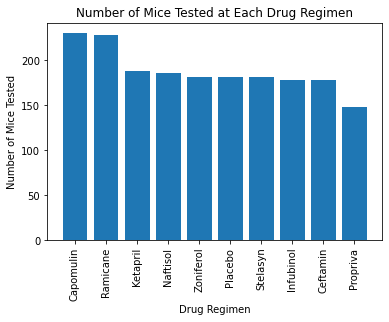

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

counts = clean_mouse_data['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)    # plt ID x and y needs to be defined
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested at Each Drug Regimen")
plt.show()


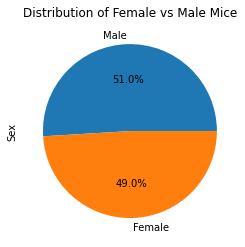

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

counts = clean_mouse_data.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.title("Distribution of Female vs Male Mice")
plt.show()


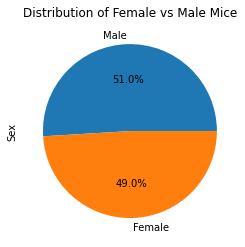

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = clean_mouse_data.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.title("Distribution of Female vs Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumour = clean_mouse_data.groupby(["Mouse ID"])['Timepoint'].max()
max_tumour = max_tumour.reset_index()

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

merged_data = max_tumour.merge(clean_mouse_data,on=['Mouse ID','Timepoint'],how="left")


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumour_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    final_tumour_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumour Volume (mm3)']
    
    # Add subset 
    
    tumour_vol_list.append(final_tumour_vol)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = final_tumour_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumour_vol.loc[(final_tumour_vol < lower_bound) | (final_tumour_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumour Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumour Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumour Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumour Volume (mm3), dtype: float64)


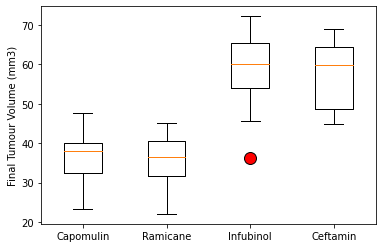

In [17]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumour_vol_list, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumour Volume (mm3)')
plt.show()


## Line and Scatter Plots

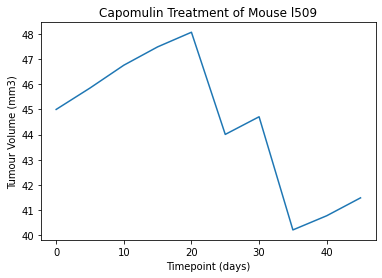

In [18]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

capomulin_table = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumour Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumour Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')
plt.show()


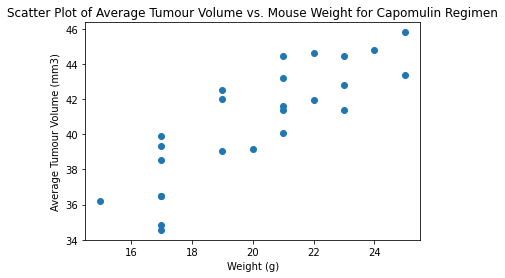

In [19]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

capomulin_table = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumour Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.title("Scatter Plot of Average Tumour Volume vs. Mouse Weight for Capomulin Regimen")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


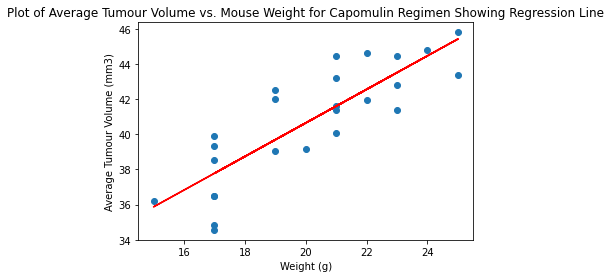

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumour Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumour Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumour Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.title("Plot of Average Tumour Volume vs. Mouse Weight for Capomulin Regimen Showing Regression Line")
plt.show()
